In [61]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [62]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [63]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [65]:
df['Ship Mode'].unique()
df['Segment'].unique()
# df['Country'].unique()
# df['City'].unique()
# df['Sales'].unique()
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [66]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


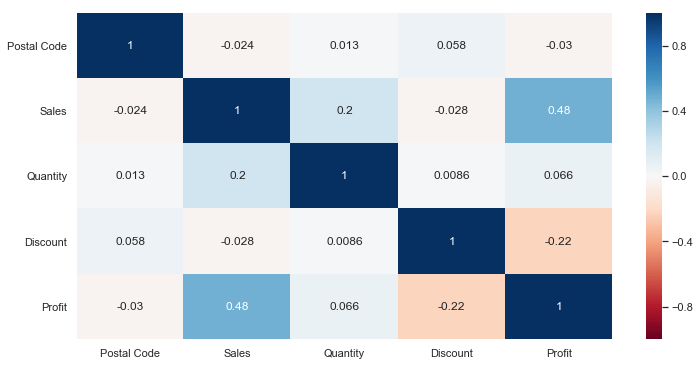

In [67]:
plt.figure(figsize=(12,6))
s = sns.heatmap(df.corr(), vmax = 1, vmin = -1, cmap = 'RdBu', annot=True)
s.set_xticklabels(s.get_xticklabels())
s.set_yticklabels(s.get_yticklabels(), rotation = 0)
plt.show()

## Finding and Plotting top 10 Cities

In [68]:
top_10_cities = df.groupby('City').agg({
    'Quantity' : 'sum',
    'Sales' : 'sum'
}).sort_values('Quantity', ascending = False)[:5]
top_10_cities

,Quantity,Sales
City,,
New York City,3417,256368.161
Los Angeles,2879,175851.341
Philadelphia,1981,109077.013
San Francisco,1935,112669.092
Seattle,1590,119540.742


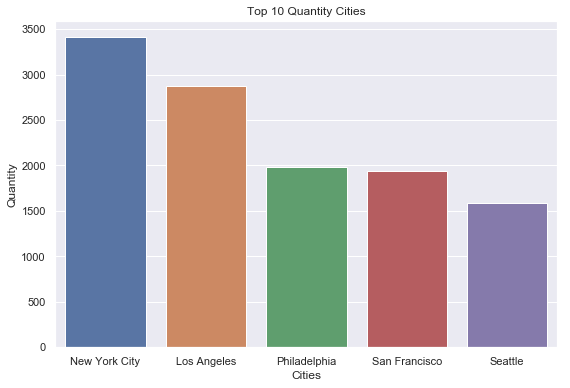

In [69]:
plt.figure(figsize = (9,6))
# plt.plot(top_10_cities.index, top_10_cities['Quantity'])
sns.barplot(top_10_cities.index, top_10_cities['Quantity'])
plt.title('Top 10 Quantity Cities')
plt.xlabel('Cities')
plt.show()

# top_10_cities.index

## Finding Profit By Segments

In [70]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [71]:
new_df = df.groupby('Segment').sum()
print(new_df['Profit'].values)
print(new_df.index)

[134119.2092  91979.134   60298.6785]
Index(['Consumer', 'Corporate', 'Home Office'], dtype='object', name='Segment')


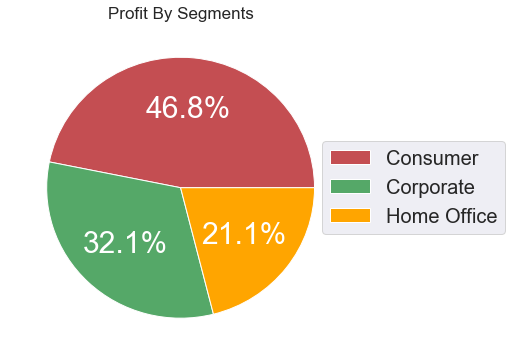

In [75]:
plt.figure(figsize=(6, 6))
plt.pie(new_df['Profit'],
        autopct = '%1.1f%%',
        colors = ('r', 'g', 'orange'),
        textprops=dict(color="w"),
       )
params = {'font.size': 30,
          'legend.fontsize': 20,
          'legend.handlelength': 2
         }
plt.rcParams.update(params)
plt.title('Profit By Segments', fontsize = 17)
plt.legend(new_df.index, loc = 'center right', bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

In [73]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [79]:
profit_city = df.groupby('City').sum()
profit_city.head()
# df['City'].value_counts()

,Postal Code,Sales,Quantity,Discount,Profit
City,,,,,
Aberdeen,57401,25.500,3,0.0,6.6300
Abilene,79605,1.392,2,0.8,-3.7584
Akron,930552,2729.986,65,7.5,-186.6356
Albuquerque,1219470,2220.160,65,0.8,634.0881
Alexandria,356864,5519.570,84,0.0,318.6183


In [84]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [91]:
a = df[df['State'] == 'Kentucky']
a['Category'].value_counts()

df['Sales'].sum()

2297200.8603

In [94]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64